# __Prediction of the price per night of Airbnb housing in Bordeaux__

*Jean-Baptiste Baitairian, Ambroise Heurtebise, Quentin Le Turdu and Fred Serfati*

<img src="images/airbnb_logo.png"
     alt="Airbnb_logo"
     style="float: right; margin-right: 10px;" />

## Introduction

Price prediction is often an interesting task for sellers as much as for customers. We can easily imagine that such a task could be useful in the domain of housing. For example, a seller wants to know what could be the best price to rent his appartment to be as competitive as possible. A customer, as for him, wants to make sure an offer is not a swindle. Therefore, in both cases, price prediction is a real issue.

This project aims at predicting the price per night of Airbnb housing in Bordeaux, given characteristics such as the number of beds, the presence of some equipment ...

## Description of the data 

The raw dataset is composed of 5237 entries, each line corresponding to a housing in Bordeaux, and 61 columns (or features).

In [79]:
# Required for running the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [80]:
# We load the raw dataset
df = pd.read_csv(r"data\airbnb_bordeaux.csv")

In [81]:
pd.set_option('display.max_columns', 100)
df.head()

,duree_minimale_sejour,reglement_interieur,description,conditions_annulation,caution,frais_menage,surcout_voyageur_supp,reduction_mois,rection_semaine,prix_nuitee,porte_chambre_verrou,extincteur,fiche_securite,kit_secours,monoxyde_carbone_detect,detecteur_fumee,espace_travail_ordi,seche_cheveux,fer_repasser,cintres,entree_24_24,salle_sport,jacuzzi,piscine,portier,interphone,cheminee_interieur,ascenseur,accessibilite,logement_fumeur,adapte_evenements,pourenfants_famille,animaux_acceptes,petit_dejeuner,television_cable,wifi,parking_sur_place,seche_linge,machine_laver,climatisation,chauffage,shampooing,produits_base,television,internet,cuisine,animal_sur_place,type_lit,type_propriete,type_logement,nblits,nbchambres,nombresdb,capacite_accueil,resume,longitude,latitude,prixnuitee,titre,url,identifiant
0,1,Notre maison est un lieu familial donc vivant ...,"Le logementWe speak english, wir sprechen deut...",NaN,400,23,25,35,5,25,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,Chien(s),NaN,Maison,Chambre privée,0,1,2,2,J'habite une grande maison que je partage tout...,-0.593501,44.849101,25,4 chambres dans Bordeaux centre,https://www.airbnb.fr/rooms/28925,28925
1,3,L'appartement est non fumeur.Vous pouvez néanm...,Le logementSitué dans le quartier des Chartron...,Modérées,0,10,0,42,30,71,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1,1,1,NaN,Vrai lit,Appartement,Logement entier,0,1,1,2,"Situé dans le quartier des Chartrons, cet appa...",-0.574601,44.856533,71,Sunny flat aux Chartrons,https://www.airbnb.fr/rooms/40151,40151
2,1,L'entrée dans les lieux se fait après 16:00,Le logementL’Échoppe des Bouilles est une mais...,Strictes,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,0,0,NaN,Vrai lit,Maison,Chambre privée,0,1,3,2,L’Échoppe des Bouilles est une maison typique ...,-0.593309,44.830634,75,L'Echoppe des Bouilles,https://www.airbnb.fr/rooms/185534,185534
3,3,L'entrée dans les lieux se fait après 15:00Ple...,Bordeaux Terrace is a two bedroom apartment in...,Modérées,200,100,0,30,20,155,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,1,1,NaN,NaN,Appartement,Logement entier,0,2,15,4,Bordeaux Terrace is a two bedroom apartment in...,-0.566032,44.836383,155,Terrace with spectacular view,https://www.airbnb.fr/rooms/222887,222887
4,1,Ne convient pas aux animauxPas de fête ni de s...,Le logementAppartement avec beaucoup de cachet...,Modérées,400,0,10,35,15,80,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,1,NaN,NaN,Appartement,Logement entier,0,1,1,4,Appartement avec beaucoup de cachet de 45m2 da...,-0.573713,44.837695,80,Appartement charme bordeaux centre,https://www.airbnb.fr/rooms/286581,286581


As you can see, the raw dataset contains floats, strings, integers but also NaNs and we will have to tackle different issues to make it usable by machine learning algorithms.

In the following, we only present you the features that we will keep for the analysis:

* duree_minimale_sejour: the minimum number of days of a stay
* conditions_annulation: the level of conditions to cancel the stay
* caution: the caution
* frais_menage: the cleaning cost
* surcout_voyageur_supp: the extra charge
* reduction_mois: a discount per month
* reduction_semaine: a discount per week
* prix_nuitee: price per night (our __target variable__)
* porte_chambre_verrou: whether there is a bolt or not on the door of the bedroom
* extincteur: whether there is a fire extinguisher or not
* fiche_securite: whether there is a security card or not
* kit_secours: whether there is a survival kit or not
* monoxyde_carbone_detect: whether there is a carbon monoxyde detector or not
* detecteur_fumee: whether there is a smoke detector or not
* espace_travail_ordi: whether there is a place to work or not
* seche_cheveux: whether there is a hairdryer or not
* fer_repasser: whether there is an iron or not
* cintres: whether there are hangers or not
* entree_24_24: whether there is someone to welcome/help you 24/24 or not
* salle_sport: whether there is a gym or not
* jacuzzi: whether there is a jacuzzi or not
* piscine: whether there is a swimming pool or not
* portier: whether there is a doorman or not
* interphone: whether there is an intercom or not
* cheminee_interieur: whether there is a fireplace or not
* ascenseur: whether there is a lift or not
* accessibilite: whether it is appropriate for disabled people or not
* logement_fumeur: whether it is possible to smoke or not
* adapte_evenements: whether events can be organized or not
* pourenfants_famille: whether it is appropriate for a family with children or not
* animaux_acceptes: whether animals are accepted or not
* petit_dejeuner: whether the breakfast is included or not
* television_cable: whether the television is equipped with fibre optic or not
* wifi: whether there is Wifi or not
* parking_sur_place: whether there is a parking or not
* seche_linge: whether there is a dryer or not
* machine_laver: whether there is a washing-machine or not
* climatisation: whether air conditionning is available or not
* chauffage: whether a heating system is available or not
* produits_base: whether basic products are provided or not
* television: whether there is a TV or not
* internet: whether there is the internet or not
* cuisine: whether there is a kitchen or not
* animal_sur_place: the kind of animals that are already in the housing
* type_lit: the type of bed
* type_propriete: the type of property
* type_logement: the type of housing
* nblits: the number of beds
* nbchambres: the number of bedrooms
* nombresdb: the number of bathrooms
* capacite_accueil: the maximum number of people that are allowed
* longitude: the longitude of the housing
* latitude: the latitude of the housing

In [82]:
df.describe()

,duree_minimale_sejour,caution,frais_menage,surcout_voyageur_supp,reduction_mois,rection_semaine,prix_nuitee,porte_chambre_verrou,extincteur,fiche_securite,kit_secours,monoxyde_carbone_detect,detecteur_fumee,espace_travail_ordi,seche_cheveux,fer_repasser,cintres,entree_24_24,salle_sport,jacuzzi,piscine,portier,interphone,cheminee_interieur,ascenseur,accessibilite,logement_fumeur,adapte_evenements,pourenfants_famille,animaux_acceptes,petit_dejeuner,television_cable,wifi,parking_sur_place,seche_linge,machine_laver,climatisation,chauffage,shampooing,produits_base,television,internet,cuisine,nblits,nbchambres,nombresdb,capacite_accueil,longitude,latitude,prixnuitee,identifiant
count,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.0,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5237.000000,5.237000e+03
mean,2.214054,262.103494,13.276112,3.277640,12.164598,7.215772,76.243078,0.038954,0.078480,0.099103,0.140729,0.118579,0.656101,0.424480,0.493221,0.487302,0.528356,0.243460,0.006874,0.008211,0.027688,0.010311,0.447012,0.086309,0.174718,0.053848,0.295971,0.080008,0.595570,0.125644,0.193622,0.204124,0.900516,0.240787,0.225702,0.715486,0.085927,0.925530,0.0,0.845522,0.727707,0.572847,0.928967,0.600917,1.294061,1.669085,3.326714,-0.575576,44.840814,76.243078,9.579002e+06
std,1.940336,374.398145,20.874048,7.276703,17.528216,8.775663,62.878115,0.193503,0.268951,0.298828,0.347775,0.323324,0.475053,0.494311,0.500002,0.499886,0.499243,0.429211,0.082633,0.090249,0.164092,0.101029,0.497232,0.280847,0.379762,0.225738,0.456522,0.271331,0.490828,0.331480,0.395174,0.403099,0.299340,0.427602,0.418084,0.451226,0.280283,0.262559,0.0,0.361441,0.445183,0.494712,0.256905,1.031764,0.897661,3.062923,1.686689,0.014046,0.012073,62.878115,4.169289e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.636883,44.811245,0.000000,2.892500e+04
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,-0.580955,44.832556,40.000000,6.359720e+06
50%,2.000000,160.000000,0.000000,0.000000,0.000000,2.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,-0.573426,44.839336,60.000000,1.095624e+07
75%,3.000000,400.000000,20.000000,0.000000,28.000000,14.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.

In order to make the problem a bit simpler, we choose to drop the columns that contain descriptions as well as columns that are not useful such as 'identifiant', 'shampooing' (all the values are 0) and 'prixnuitee' (because there is another column called 'prix_nuitee' that we keep because it is our target variable). As you can see, some features have abnormal values such as 'nombresdb' with 75 bathrooms! We will have to clean the dataset before performing training and prediction. We also rename the column 'rection_semaine' into 'reduction_semaine'.

In [83]:
df = df.drop(columns=['reglement_interieur', 'description', 'resume', 'titre', 'url', 'identifiant', 'prixnuitee', 'shampooing'])

In [84]:
df = df.rename(columns={'rection_semaine': 'reduction_semaine'})

## Data exploration

We now explore a bit more the dataset to understand the task and the dependencies between the features.

First, we plot the logarithm of the price per night over the map of Bordeaux using the latitude and the longitude.

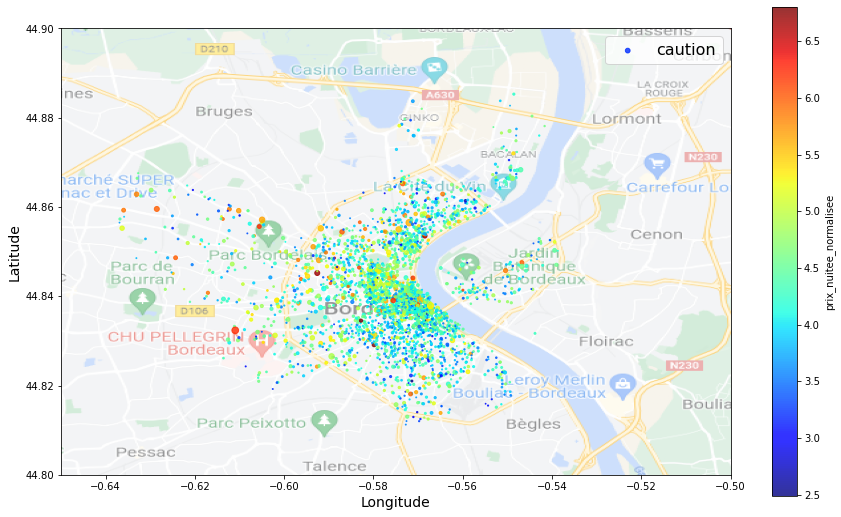

In [85]:
img = plt.imread("images/bordeaux_map.png")

# We need to remove the rows with a price per night that is equal to 0.
# Moreover, we consider that a price per night of 0 is impossible.
df = df.drop(df[df["prix_nuitee"] == 0].index)

df["prix_nuitee_normalisee"] = np.log(df["prix_nuitee"])
ax = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8, figsize=(15,9),
             s=df["caution"]/100, label="caution",
             c="prix_nuitee_normalisee", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

plt.imshow(img, extent=[-0.65, -0.50, 44.8, 44.90], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

As we can see, the more the housing is located in the center of Bordeaux, the more it is expensive, certainly because the houses are older and have an historical interest and because there are more shops. We can also note that very expensive housings are in the outskirt of the city. This is probably because the houses are bigger and have a pool and/or a garden.

Then, we plot the histogram of the price per night.

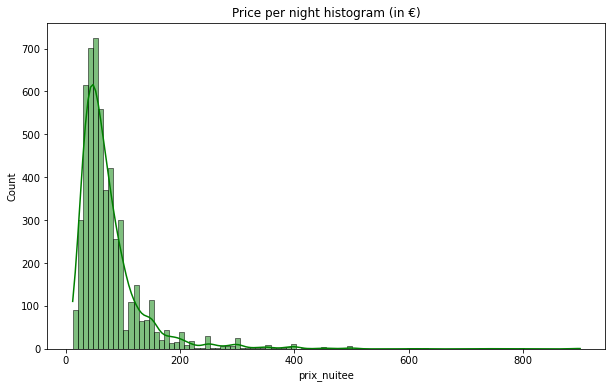

In [86]:
plt.figure(figsize=(10,6))
sns.histplot(x='prix_nuitee', data=df, kde=True, bins=100, color='green').set(title='Price per night histogram (in €)');

We can see that the majority of prices per night are around 70€, with a minimum near 0 and a maximum at 900€.

We can also group the plots by the type of housing to see if there is an effect.

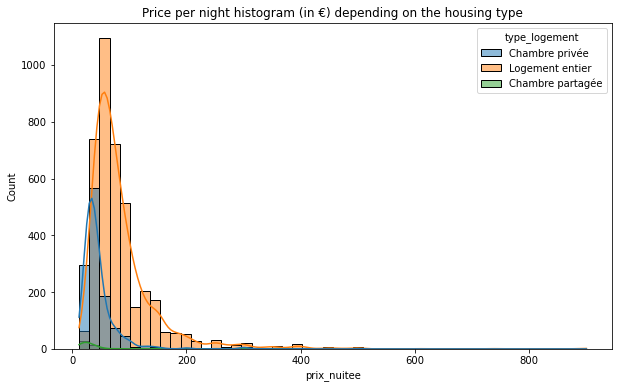

In [87]:
plt.figure(figsize=(10,6))
sns.histplot(x='prix_nuitee', hue='type_logement', bins=50, data=df, kde=True).set(title='Price per night histogram (in €) depending on the housing type');

As it was possible to imagine, shared bedrooms are less expensive than private bedrooms in mean. A complete housing is also more expensive than a private bedroom in mean. Let's compare the means on a bar plot.

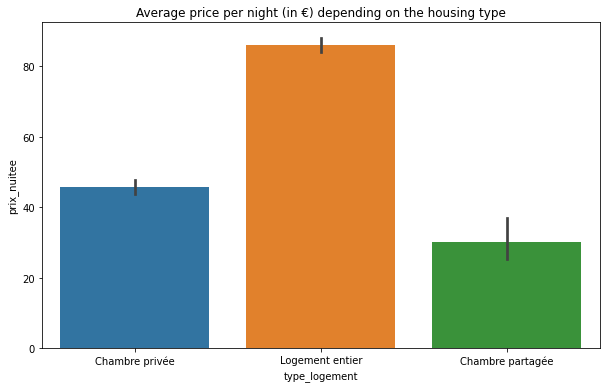

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(x='type_logement', y='prix_nuitee', data=df).set_title("Average price per night (in €) depending on the housing type");

This confirms what we thought just before.

Now, let's see if there are correlations between our variables.

Text(0.5, 1.0, 'Correlation matrix')

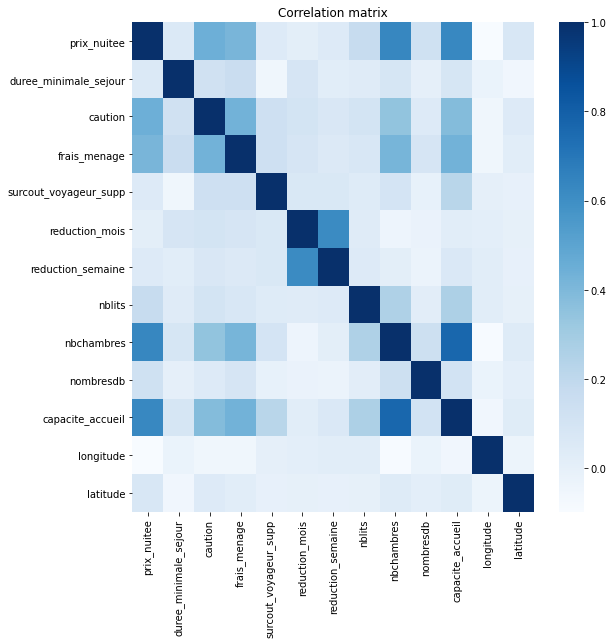

In [89]:
plt.figure(figsize=(9,9))
corr = df[['prix_nuitee', 'duree_minimale_sejour', 'caution', 'frais_menage', 'surcout_voyageur_supp', 'reduction_mois', 
          'reduction_semaine', 'nblits', 'nbchambres', 'nombresdb', 'capacite_accueil', 'longitude', 'latitude']].corr()

sns.heatmap(corr, cmap="Blues")
plt.title('Correlation matrix')

As we can see, the price per night is highly correlated with the number of bedrooms and the capacity, which is logical. We can also note that, when the price per night is high, the caution and the cleaning charge are also high. On the contrary, when the price per night is high, the discounts tend to be less important but the extra charge tends to be lower too.

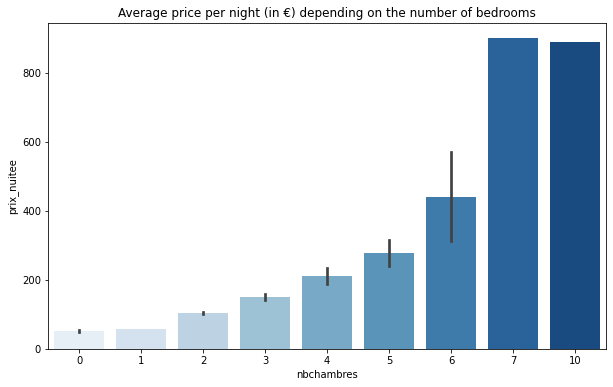

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x='nbchambres', y='prix_nuitee', data=df, palette='Blues').set(title="Average price per night (in €) depending on the number of bedrooms");

The barplot above confirms the observations made with the correlation matrix. Surprisingly, the price per night reaches a plateau when there are more than 7 bedrooms. This can be normal if we work on the assumption that the price cannot tend towards infinity.

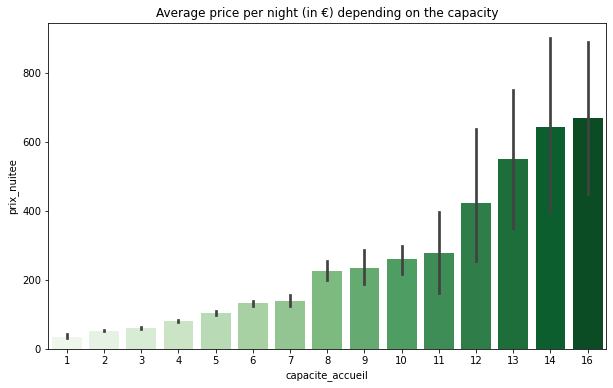

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(x='capacite_accueil', y='prix_nuitee', data=df, palette='Greens').set(title="Average price per night (in €) depending on the capacity");

This graph also confirms the observations made on the correlation matrix.

<Figure size 720x504 with 0 Axes>

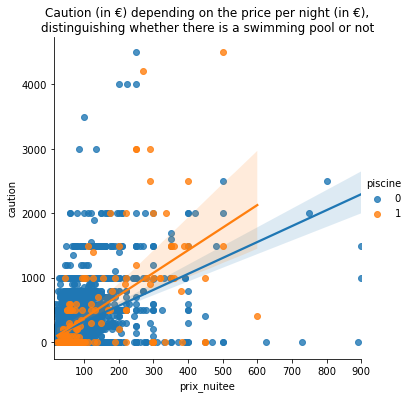

In [92]:
plt.figure(figsize=(10,7))
sns.lmplot(x='prix_nuitee', y='caution', hue='piscine', data=df).set(title="Caution (in €) depending on the price per night (in €),\ndistinguishing whether there is a swimming pool or not");

We can see that, the more the price per night is high, the more the caution is important. Moreover, distinguishing whether there is a swimming pool or not, we can see that its presence can be synonym of high caution when the price per night is important.

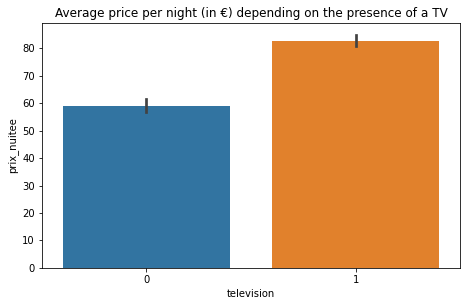

In [93]:
plt.figure(figsize=(7.5,4.5))
sns.barplot(x='television', y='prix_nuitee', data=df).set(title="Average price per night (in €) depending on the presence of a TV");

In mean, when there is a TV, the price per night is 20€ more than when there is no TV.

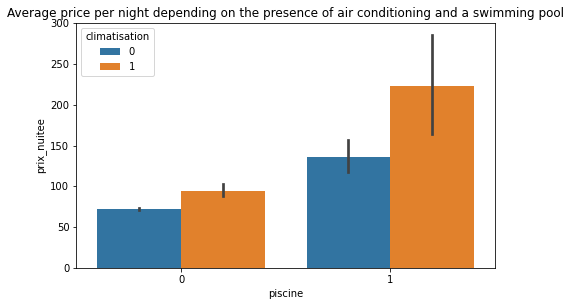

In [94]:
plt.figure(figsize=(7.5,4.5))
sns.barplot(x='piscine', y='prix_nuitee', hue='climatisation', data=df).set(title="Average price per night depending on the presence of air conditioning and a swimming pool");

Finally, it is interesting to see that the price per night increases when there is air conditionning and that the difference is sharper when there is a swimming pool.

## Cleaning of the dataset

In this part, we explain how we chose to clean the dataset in order to make it usable by machine learning algorithms. The cleaned datasets are those that are provided in the challenge.

The following command allows us to see if there are some missing values.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5236
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duree_minimale_sejour    5234 non-null   int64  
 1   conditions_annulation    4271 non-null   object 
 2   caution                  5234 non-null   int64  
 3   frais_menage             5234 non-null   int64  
 4   surcout_voyageur_supp    5234 non-null   int64  
 5   reduction_mois           5234 non-null   int64  
 6   reduction_semaine        5234 non-null   int64  
 7   prix_nuitee              5234 non-null   int64  
 8   porte_chambre_verrou     5234 non-null   int64  
 9   extincteur               5234 non-null   int64  
 10  fiche_securite           5234 non-null   int64  
 11  kit_secours              5234 non-null   int64  
 12  monoxyde_carbone_detect  5234 non-null   int64  
 13  detecteur_fumee          5234 non-null   int64  
 14  espace_travail_ordi     

As you can see, 'conditions_annulation', 'animal_sur_place' and 'type_lit' have missing values. Moreover, 'conditions_annulation', 'type_lit', 'type_propriete' and 'type_logement' are strings so we will use a one-hot encoding to make them usable.

### Missing values

We will consider that, if 'conditions_annulation' is missing, then we can consider it strict because it is complicated to cancel the stay.

In [96]:
df = df.fillna({"conditions_annulation": "Strictes"})
df = df.replace(to_replace={'Flexibles': 'flexibles', 'Modérées': 'moderees', 'Strictes': 'strictes'})

For the variable 'animal_sur_place', we will put a '1' when there are already animals in the housing and a '0' otherwise to make this simple (the type of animal can be useless and could only create noise in the predictions).

In [97]:
df["animal_sur_place"] = df["animal_sur_place"].notna().astype('int')

For the variable 'type_lit', if we look at the offer using the URL that is provided, we can see that there are missing values when there are different types of beds. That is why we replace missing values with a new category called 'multiples'.

In [98]:
df = df.fillna({"type_lit": "multiples"})
df = df.replace(to_replace={'Vrai lit': 'vrai_lit', 'Canapé convertible': 'canape_convertible', 'Canapé': 'canape'})

For the variable 'type_propriete', we put 'Villa' in the category 'maison' (because there is only one villa) and we gather 'Bungalow', 'Cabane', 'Dortoir' and 'Maison écologique' in 'bungalow_cabane_dortoir_eco'.

In [99]:
df = df.replace(to_replace={'Appartement': 'appartement', 'Maison': 'maison', 'Maison de ville': 'maison_de_ville', 'Bed & Breakfast': 'bed_and_breakfast', 'Appartement en résidence': 'appart_en_residence', 'Loft': 'loft', 'Inconnue': 'inconnu', 'Autre': 'autre', 'Bungalow': 'bungalow_cabane_dortoir_eco', 'Villa': 'maison', 'Cabane': 'bungalow_cabane_dortoir_eco', 'Maison écologique': 'bungalow_cabane_dortoir_eco', 'Dortoir': 'bungalow_cabane_dortoir_eco'})

For the variable 'type_logemement', we only change the names.

In [100]:
df = df.replace(to_replace={'Logement entier': 'logement_entier', 'Chambre privée': 'chambre_privee', 'Chambre partagée': 'chambre_partagee'})

### One-hot encoding

We proceed to a one-hot encoding on 'conditions_annulation', 'type_lit', 'type_propriete' and 'type_logement'.

In [101]:
df = pd.get_dummies(df, columns=["conditions_annulation"])
df = pd.get_dummies(df, columns=["type_lit"])
df = pd.get_dummies(df, columns=["type_propriete"])
df = pd.get_dummies(df, columns=["type_logement"])

We now replace the number of bathrooms by 1 when it is higher than 15 (because, if we look at the offers, we can see that there are some errors in the dataset such as some houses with 15 bathrooms even if it written 1 bathroom in the real offer).

In [102]:
df.loc[df['nombresdb'] >= 15] = 1

We now have a cleaned dataset that looks like the following one.

In [103]:
df.head()

,duree_minimale_sejour,caution,frais_menage,surcout_voyageur_supp,reduction_mois,reduction_semaine,prix_nuitee,porte_chambre_verrou,extincteur,fiche_securite,kit_secours,monoxyde_carbone_detect,detecteur_fumee,espace_travail_ordi,seche_cheveux,fer_repasser,cintres,entree_24_24,salle_sport,jacuzzi,piscine,portier,interphone,cheminee_interieur,ascenseur,accessibilite,logement_fumeur,adapte_evenements,pourenfants_famille,animaux_acceptes,petit_dejeuner,television_cable,wifi,parking_sur_place,seche_linge,machine_laver,climatisation,chauffage,produits_base,television,internet,cuisine,animal_sur_place,nblits,nbchambres,nombresdb,capacite_accueil,longitude,latitude,prix_nuitee_normalisee,conditions_annulation_flexibles,conditions_annulation_moderees,conditions_annulation_strictes,type_lit_canape,type_lit_canape_convertible,type_lit_multiples,type_lit_vrai_lit,type_propriete_appart_en_residence,type_propriete_appartement,type_propriete_autre,type_propriete_bed_and_breakfast,type_propriete_bungalow_cabane_dortoir_eco,type_propriete_inconnu,type_propriete_loft,type_propriete_maison,type_propriete_maison_de_ville,type_logement_chambre_partagee,type_logement_chambre_privee,type_logement_logement_entier
0,1,400,23,25,35,5,25,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0,1,2,2,-0.593501,44.849101,3.218876,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,0,10,0,42,30,71,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,1,2,-0.574601,44.856533,4.262680,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,1,3,2,-0.593309,44.830634,4.317488,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,400,0,10,35,15,80,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,1,4,-0.573713,44.837695,4.382027,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


## A first example of a machine learning algorithm

We first load the training and the test sets.

In [104]:
df_train = pd.read_csv(rf".\data\train\train.csv")
y_train = df_train["prix_nuitee"]  # Target variable
X_train = df_train.drop(columns=["prix_nuitee"])  # Covariates

df_test = pd.read_csv(rf".\data\test\test.csv")
y_test = df_test["prix_nuitee"]  # Target variable
X_test = df_test.drop(columns=["prix_nuitee"])  # Covariates

In [105]:
y_train.head()

0     23
1     80
2    160
3     45
4     80
Name: prix_nuitee, dtype: int64

In [106]:
X_train.head()

,duree_minimale_sejour,caution,frais_menage,surcout_voyageur_supp,reduction_mois,reduction_semaine,porte_chambre_verrou,extincteur,fiche_securite,kit_secours,monoxyde_carbone_detect,detecteur_fumee,espace_travail_ordi,seche_cheveux,fer_repasser,cintres,entree_24_24,salle_sport,jacuzzi,piscine,portier,interphone,cheminee_interieur,ascenseur,accessibilite,logement_fumeur,adapte_evenements,pourenfants_famille,animaux_acceptes,petit_dejeuner,television_cable,wifi,parking_sur_place,seche_linge,machine_laver,climatisation,chauffage,produits_base,television,internet,cuisine,animal_sur_place,nblits,nbchambres,nombresdb,capacite_accueil,longitude,latitude,conditions_annulation_flexibles,conditions_annulation_moderees,conditions_annulation_strictes,type_lit_canape,type_lit_canape_convertible,type_lit_multiples,type_lit_vrai_lit,type_propriete_appart_en_residence,type_propriete_appartement,type_propriete_autre,type_propriete_bed_and_breakfast,type_propriete_bungalow_cabane_dortoir_eco,type_propriete_inconnu,type_propriete_loft,type_propriete_maison,type_propriete_maison_de_ville,type_logement_chambre_partagee,type_logement_chambre_privee,type_logement_logement_entier
0,2,0,0,0,50,25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,0,0,1,1,3,-0.625022,44.857362,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,300,50,0,50,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,2,-0.569310,44.836233,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2,2,1000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,2,2,2,4,-0.577100,44.850588,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2,0,0,10,30,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,4,-0.586136,44.850940,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2,700,0,0,20,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,1,2,-0.625619,44.863684,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


We can now apply a linear regression.

In [107]:
model = LinearRegression()
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=26)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
errors = -scores

In [108]:
print(errors)
print(errors.mean())

[39.63757143 37.80827609 47.83249121 35.04251835 46.98259756 44.4014886
 45.1102222  37.69162473 48.59321742 44.13576221]
42.72357698051204


In [109]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 81.35565998,  86.31779064,  50.06231662, 217.31947715,
         1.        , 109.26805762, 225.08377958,  58.71251015,
        46.12522753,   1.        ,  83.97083378,  25.25881701,
        55.89072544,  51.45753017, 155.26019927,  22.1157028 ,
        69.41512775,  26.72120602,  29.45124411,  56.25188869,
        35.30648651,  46.68421339,  78.70068537,  71.73686206,
       245.00468539,  54.62554567,  89.87348396,  45.67058814,
       188.05007269, 109.44762819,  53.31235555, 107.21154996,
        52.1887444 ,  47.48015695,  56.29617966,  56.81900949,
        78.08023259,  31.5230376 ,  52.21153378, 161.07203952,
        36.86102919,  97.17777951, 113.77908047,  20.19004977,
        27.41132195,  58.65068292,  32.24460821,  36.20085067,
       183.24678253,  61.12395913, 122.82643275, 102.61838615,
       120.74386374, 115.98150423,  59.25785155,  53.7085485 ,
         1.        ,  41.10111529,  60.91123144, 176.14668204,
        98.75820548,  54.46394684,  90.67852063,  48.06

In [110]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE =", rmse)

RMSE = 37.17197683973946


Your algorithm should at least beat this number.

## Quick submission test

Finally, make sure the local processing goes through by running the
```
ramp-test --submission <submission folder>
```
If you want to quickly test the that there are no obvious code errors, use the `--quick-test` flag to only use a small subset of the data (training and testing sets with 5 elements each).

```
ramp-test --submission <submission folder> --quick-test
```

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.